<a href="https://colab.research.google.com/github/OCE1984/MScDataAnaltyicsPrinciples/blob/main/DAP_Final_AssessmentOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Analysis

## Importing Tools

To analyse the data, the analyst will require the use of pre-written algorithms. To ensure that the algorithms and their associated libraries are easy to find, it is standard to co-locate all required algorithms in one box at the beginning of the coding script.

In [ ]:
!pip install yellowbrick
!pip install scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import matplotlib.ticker as ticker
import time









from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer, silhouette_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, silhouette_samples
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

For this project, an open source dataset from kaggle will be used. The dataset can be obtained from the following location:

https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction/data

The dataset is a collection of customer satisfaction surveys for people who have travelled as a passenger on a commercial airline.

As the coding medium used is 'Google Colab', the dataset has been storedd on Github and will be pulled from that location for the analysis.

In [3]:
file_path = "https://raw.githubusercontent.com/OCE1984/MScDataAnaltyicsPrinciples/main/airline_passenger_satisfaction.csv"
df_original = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

Once the dataset is loaded into the coding environment, the dataset must be analysed to determine the size, shape and content of the dataset. This step is known as Exploratory Data Analysis (EDA) and helps the analyst to understand the dataset before any analysis is carried out.

This will not only direct the analyst in the most suitable types of analysis to use, but also determine whether or not the dataset is configured correctly for data analysis.

In [4]:
print("\nDataset Info:")
df_original.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking       

By looking at the 'info' of the dataset, it's possible to see the structure and the content of the dataset.

First, the number of records contained within the dataset is 129,880 entries. It is recommended that a dataset has a minimum of 500 entries for machine learning algorithms to be effective, so the dataset can be used for machine learning purposes. This is to ensure that there is enough data to split into training and test subsets of the data and still provide enough different combinations of possible data configurations to identify trends.

Next, it's possible to see that there are 24 columns in total, as well as the name of each of the columns within the dataset. This is extremely useful as it allows the analyst to transform the data within any given column contained in the dataset.

Then, it can also be seen how many 'non-null' values there are in each column. If the value is less than the number of entries in the dataset, then that column is gong to have missing values. This can be verified by running a 'missing values' code to clearly show where any missing entries are for any given column.

In [5]:
print("\nMissing Values:")
print(df_original.isnull().sum())


Missing Values:
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Enterta

The 'missing values' code has confirmed that there are 393 missing values from the 'Arrival Delay' column. Before any analysis can be carried out, the null-values will have to be addressed to ensure that they don't influence the accuracy of any modelling carried out. This will be addressed in the next section 'Data Cleaning'.

Finally, the data type (DType), is visible to show what kind of data each column has. The 'Arrival Delay' is a float format, so this will have to be converted to an integer format in the 'Data Cleaning' section.

Now that the dataset is better understood, it is good practice to create a 'Data Dictionary'. The purpose of the dictionary to is communicate to anyone else who needs to interact with the dataset. It explains all the columns and provides the context behind the variables within the columns.

In [6]:
column_descriptions = {
    "ID": "Unique identifier for each passenger",
    "Gender": "Passenger's gender (Male/Female)",
    "Age": "Passenger's age in years",
    "Customer Type": "Type of customer (Loyal or Disloyal customer)",
    "Type of Travel": "Purpose of flight (Personal or Business)",
    "Class": "Ticket class (Economy, Premium Economy, Business)",
    "Flight Distance": "Distance of the flight in miles",
    "Departure Delay": "Departure delay duration (minutes)",
    "Arrival Delay": "Arrival delay duration (minutes)",
    "Departure and Arrival Time Convenience": "Rating for convenience of departure/arrival times",
    "Ease of Online Booking": "Rating of the ease of online booking, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Check-in Service": "Rating of check-in service quality, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Online Boarding": "Rating of online boarding experience, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Gate Location": "Rating for convenience/location of gate, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "On-board Service": "Rating for onboard customer service, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Seat Comfort": "Rating for comfort of the seats, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Leg Room Service": "Rating for legroom availability, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Cleanliness": "Rating for cleanliness of the aircraft, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Food and Drink": "Rating for onboard food and drink quality, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "In-flight Service": "Rating for overall inflight service, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "In-flight Wifi Service": "Rating for onboard wifi service quality, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "In-flight Entertainment": "Rating for inflight entertainment options, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Baggage Handling": "Rating for baggage handling experience, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Satisfaction": "Overall passenger satisfaction (Satisfied/Neutral or Dissatisfied)",
}

data_dict = pd.DataFrame({
    "Column Name": df_original.columns,
    "Data Type": df_original.dtypes.values,
    "Description": [column_descriptions.get(col, "No description provided") for col in df_original.columns]
})

data_dict.to_csv("completed_data_dictionary.csv", index=False)

In [7]:
print("\nSummary Statistics:")
df_original.describe()


Summary Statistics:


,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
categorical_cols = df_original.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = df_original[col].unique()
    print(f"Unique values for '{col}': {unique_values}")

Unique values for 'Gender': ['Male' 'Female']
Unique values for 'Customer Type': ['First-time' 'Returning']
Unique values for 'Type of Travel': ['Business' 'Personal']
Unique values for 'Class': ['Business' 'Economy' 'Economy Plus']
Unique values for 'Satisfaction': ['Neutral or Dissatisfied' 'Satisfied']


In [9]:
summary_table = pd.DataFrame()

for col in categorical_cols:
    # Calculate counts for each level
    counts = df_original[col].value_counts().reset_index()
    counts.columns = ['Level', 'Count']

    # Calculate percentage for each level
    counts['Percentage'] = (counts['Count'] / counts['Count'].sum()) * 100

    # Add variable name to the table
    counts['Variable'] = col
    summary_table = pd.concat([summary_table, counts], ignore_index=True)

# Reorder columns for better readability
summary_table = summary_table[['Variable', 'Level', 'Count', 'Percentage']]

# Display the table
summary_table

,Variable,Level,Count,Percentage
0,Gender,Female,65899,50.738374
1,Gender,Male,63981,49.261626
2,Customer Type,Returning,106100,81.690791
3,Customer Type,First-time,23780,18.309209
4,Type of Travel,Business,89693,69.058362
5,Type of Travel,Personal,40187,30.941638
6,Class,Business,62160,47.859563
7,Class,Economy,58309,44.894518
8,Class,Economy Plus,9411,7.245919
9,Satisfaction,Neutral or Dissatisfied,73452,56.553742


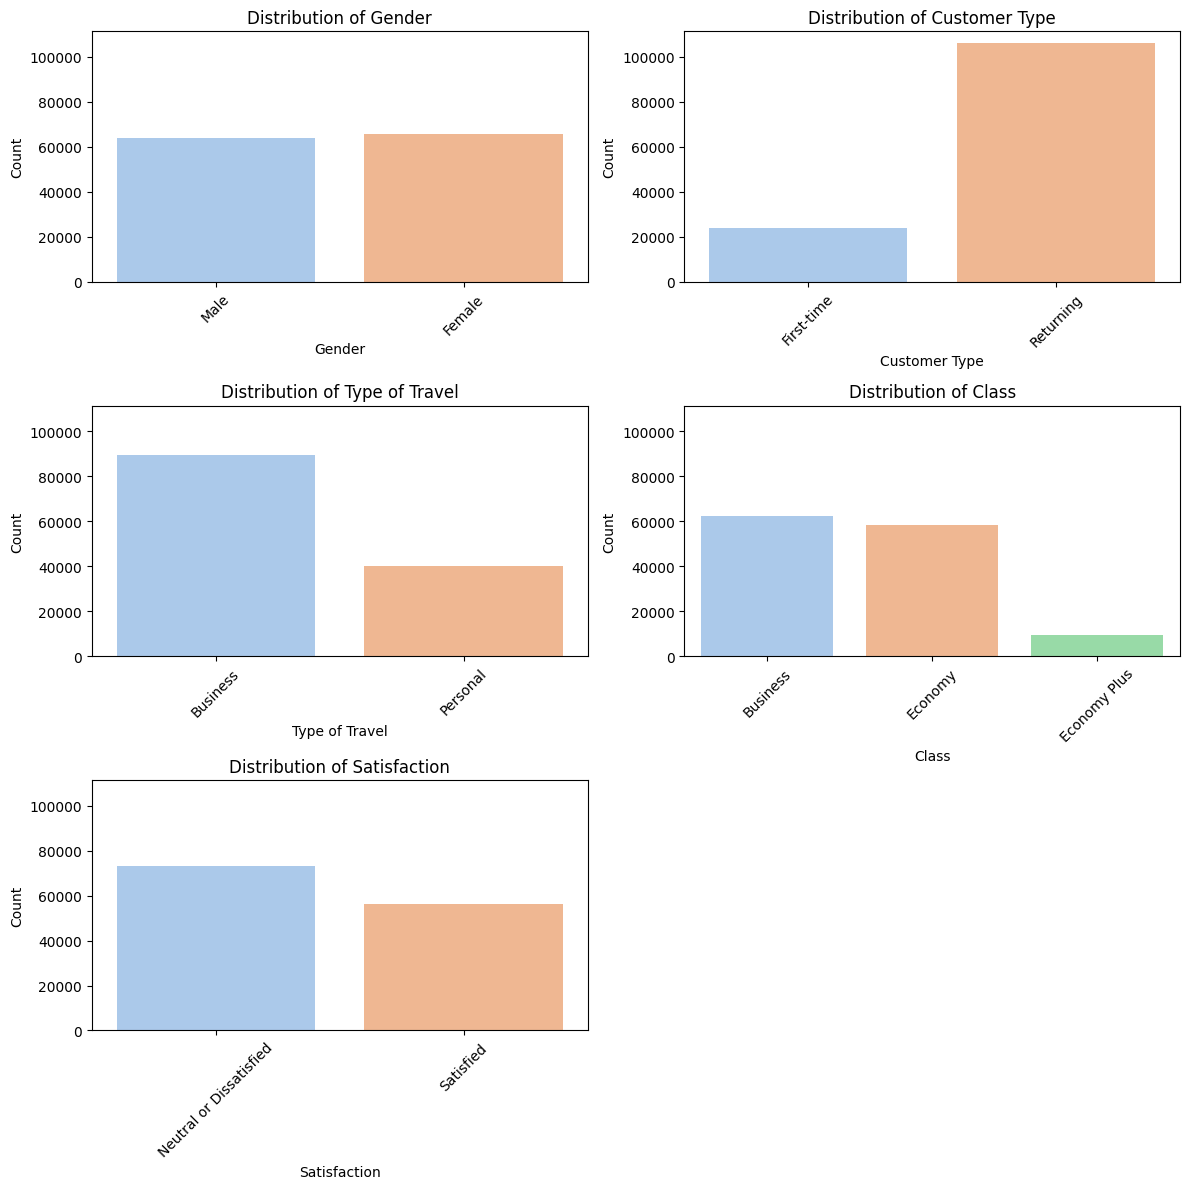

In [10]:
categorical_cols = df_original.select_dtypes(include='object').columns

# Create a figure and grid of subplots

    # Calculate number of rows needed for the grid
num_cols = 2  # Figures per row
num_rows = math.ceil(len(categorical_cols) / num_cols)

# Create a figure and grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate and plot on subplots
max_count = 0  # Initialize variable to store maximum count


# Iterate and plot on subplots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_original, x=col, palette="pastel", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

    # Update max_count if current plot has a higher count
    current_max = axes[i].get_ylim()[1]
    if current_max > max_count:
        max_count = current_max

# Set ylim for all subplots to the maximum count
for ax in axes:
    ax.set_ylim(0, max_count)

# Hide any unused subplots
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

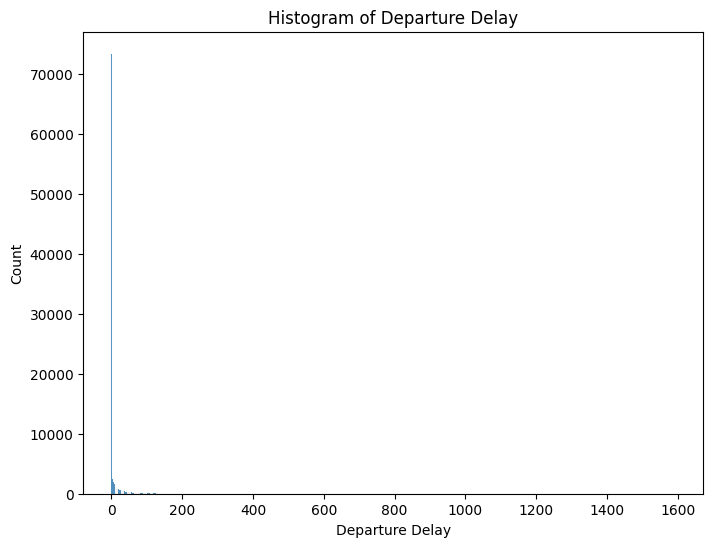

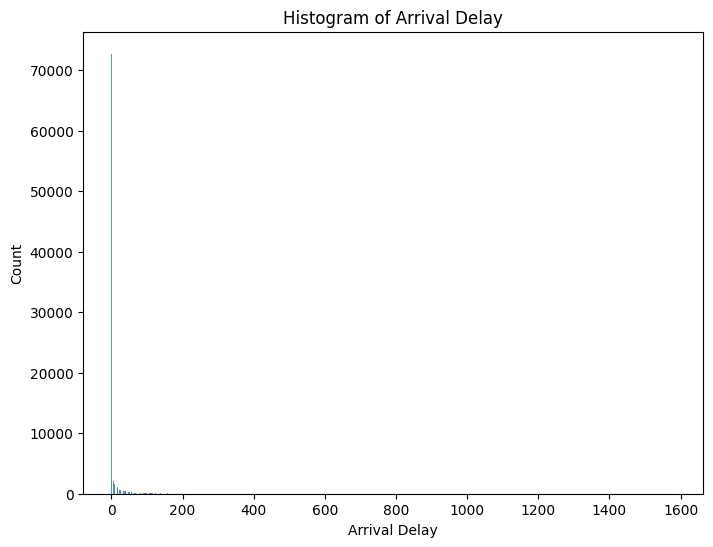

In [11]:
numerical_cols = df_original.select_dtypes(include=['int64', 'float64']).columns

for col in ['Departure Delay','Arrival Delay']:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(data=df_original, x=col)
    plt.title(f'Histogram of {col}') # set title
    plt.show()

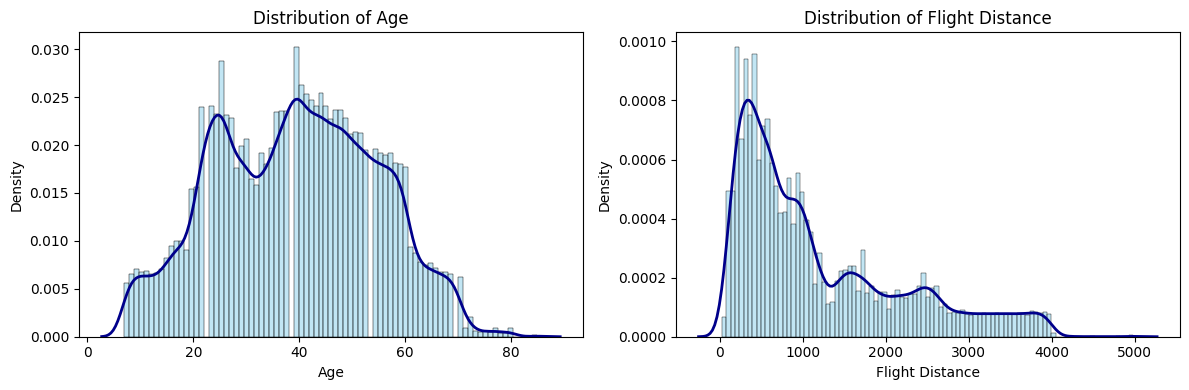

In [12]:
# Numerical columns to plot
numerical_cols = ['Age', 'Flight Distance']

# Setup subplot grid
num_cols = 2
num_rows = math.ceil(len(numerical_cols) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()

# Plot histograms with KDE overlayed correctly
for i, col in enumerate(numerical_cols):
    # Plot histogram with density normalization to match KDE
    sns.histplot(data=df_original, x=col, ax=axes[i],
                 color='skyblue', alpha=0.5, kde=False, stat='density')

    # Explicitly overlay KDE in dark blue
    sns.kdeplot(data=df_original, x=col, ax=axes[i], color='darkblue', linewidth=2)

    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Hide any unused subplot
for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

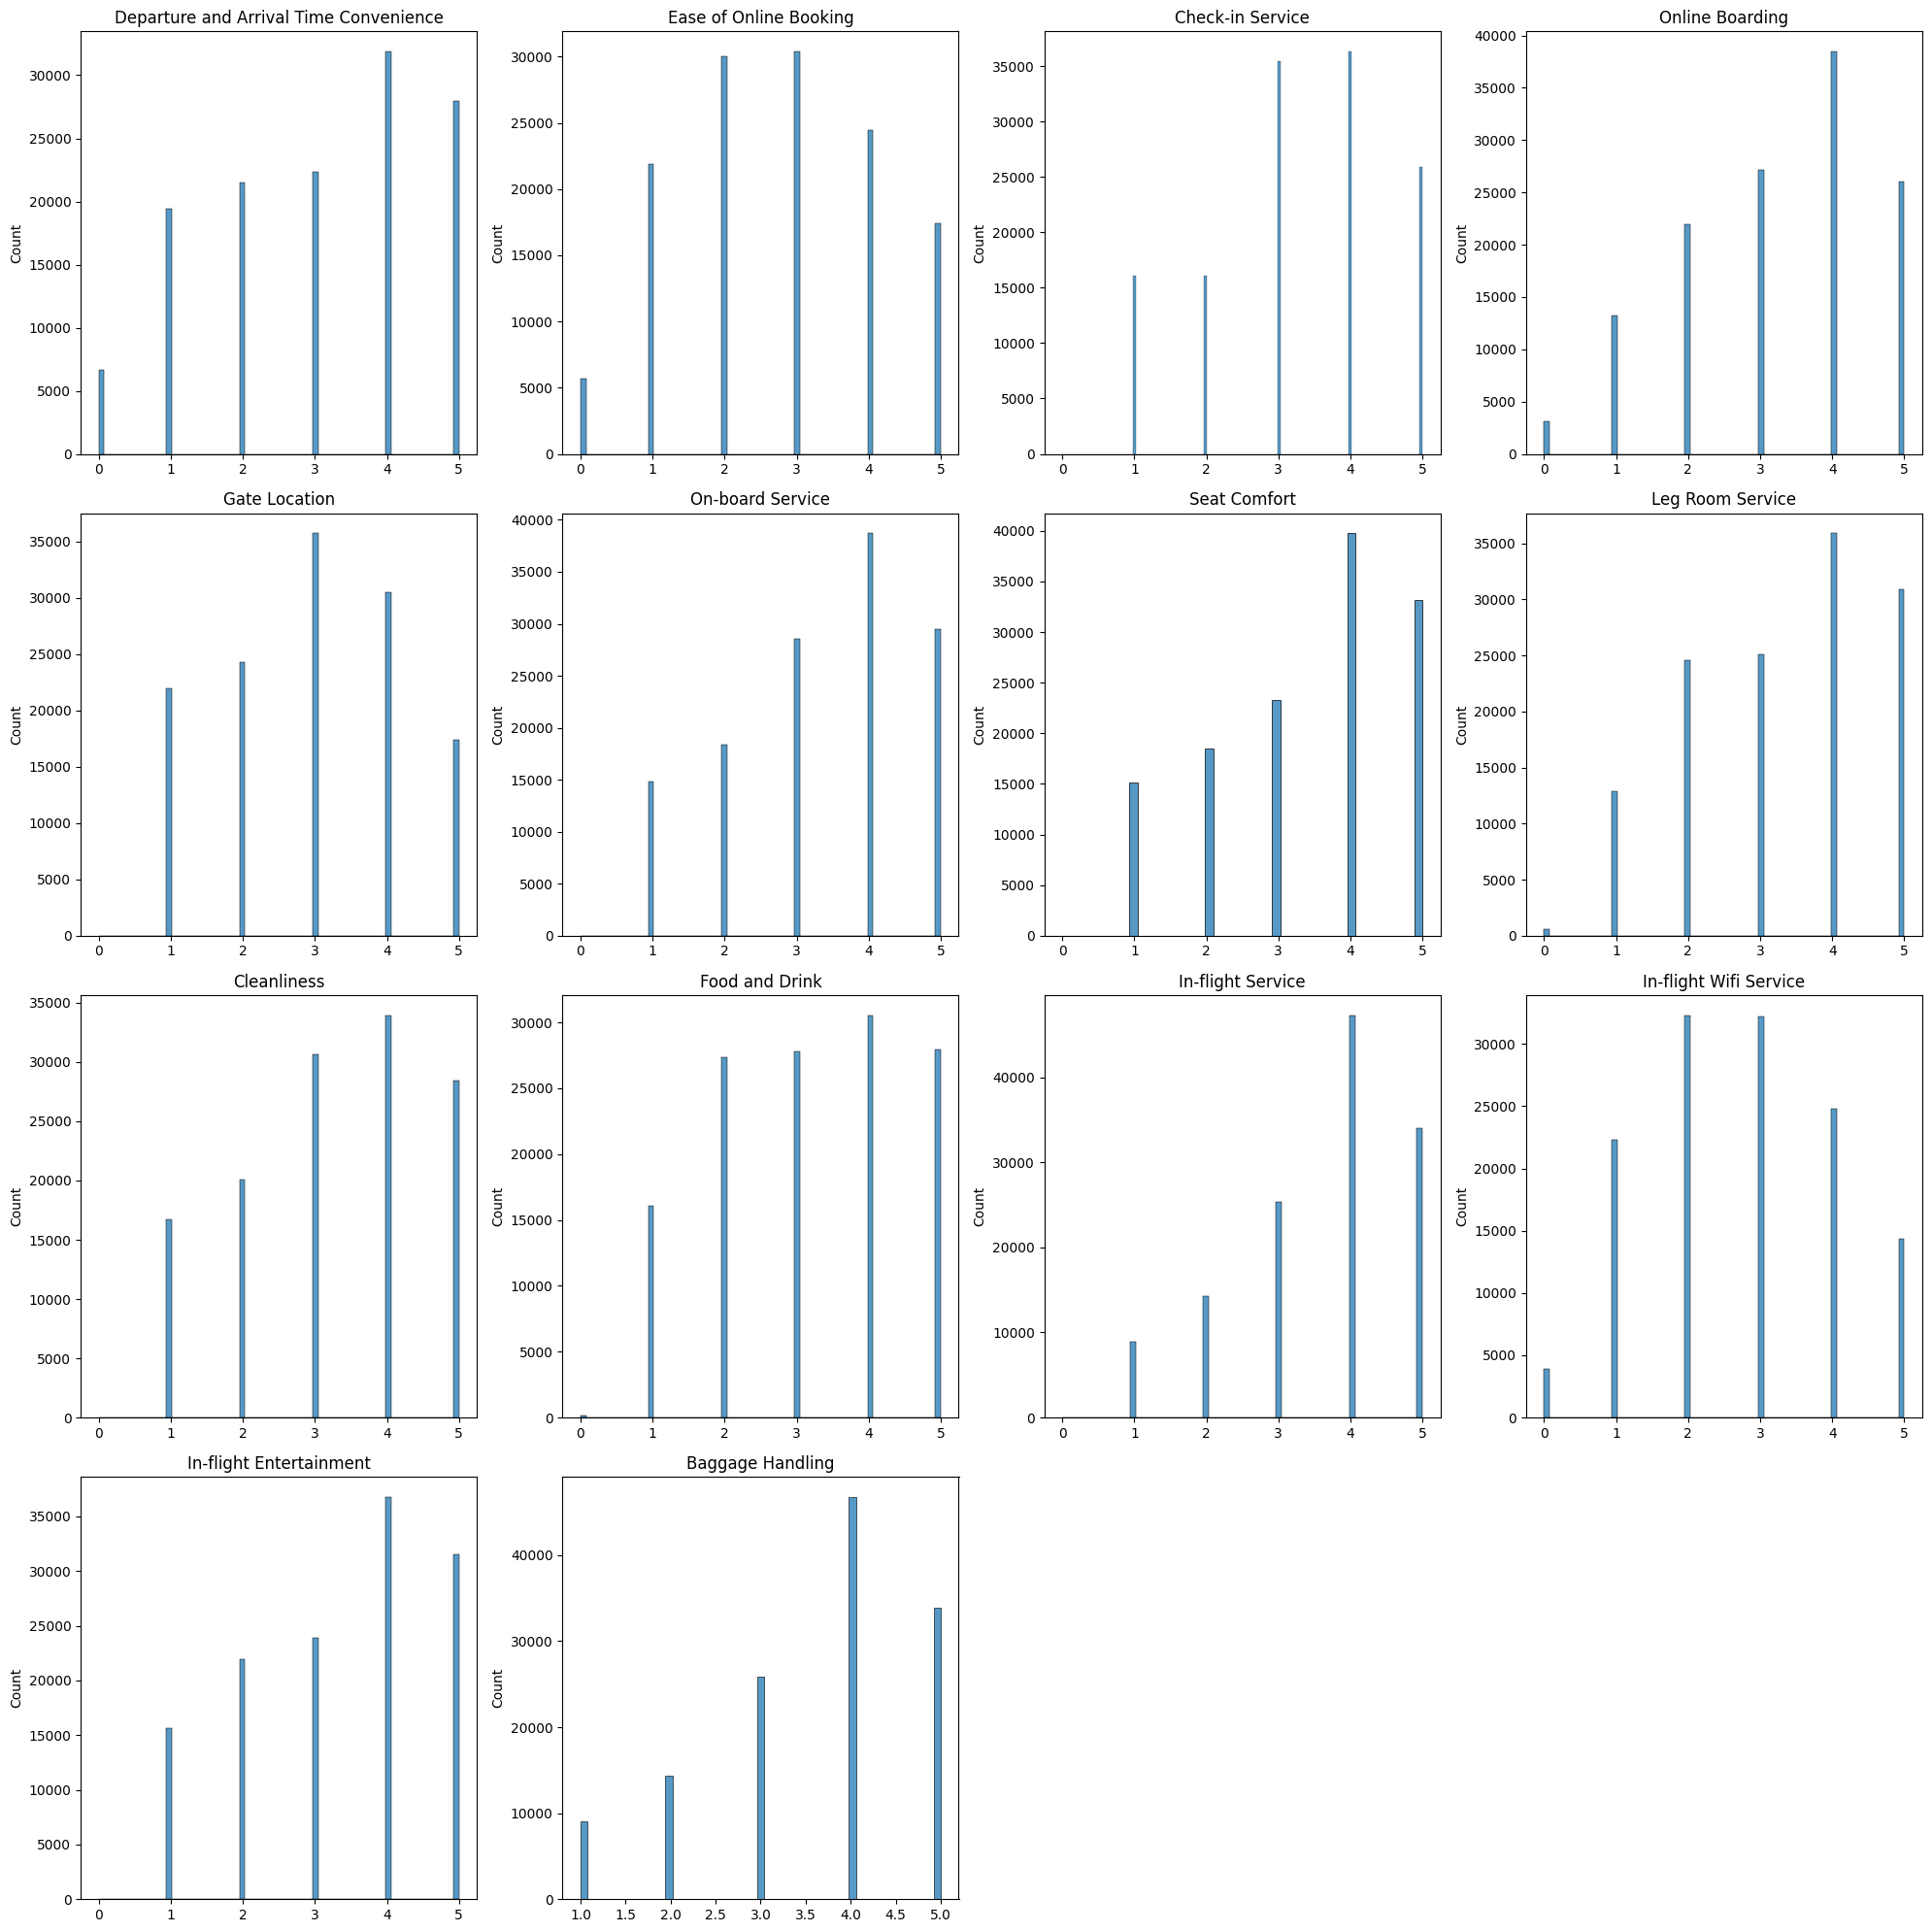

In [13]:
# Specify the columns for the histplots
columns_to_plot = [
    'Departure and Arrival Time Convenience',
    'Ease of Online Booking',
    'Check-in Service',
    'Online Boarding',
    'Gate Location',
    'On-board Service',
    'Seat Comfort',
    'Leg Room Service',
    'Cleanliness',
    'Food and Drink',
    'In-flight Service',
    'In-flight Wifi Service',
    'In-flight Entertainment',
    'Baggage Handling'
]

# Calculate the number of rows and columns for the subplot grid
n_cols = 4
n_rows = math.ceil(len(columns_to_plot) / n_cols)

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create the histplots for each column
for i, col in enumerate(columns_to_plot):
  sns.histplot(df_original[col], ax=axes[i])
  axes[i].set_title(col)
  axes[i].set_xlabel("") # Remove x-axis label for clarity

# Hide any unused subplots
for j in range(len(columns_to_plot), len(axes)):
  axes[j].set_visible(False)


# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


We can see 14 integer variables are satisfaction scores varying from 1-5 (with 0 = non applicable):

Departure and Arrival Time Convenience
Ease of Online Booking
Check-in Service
Online Boarding
Gate Location
On Board Service
Seat Comfort
Leg Room Service
Cleanliness
Food and Drink
In-Flight service
In-Flight WiFi service
In-Flight Entertainment
Baggage Handling

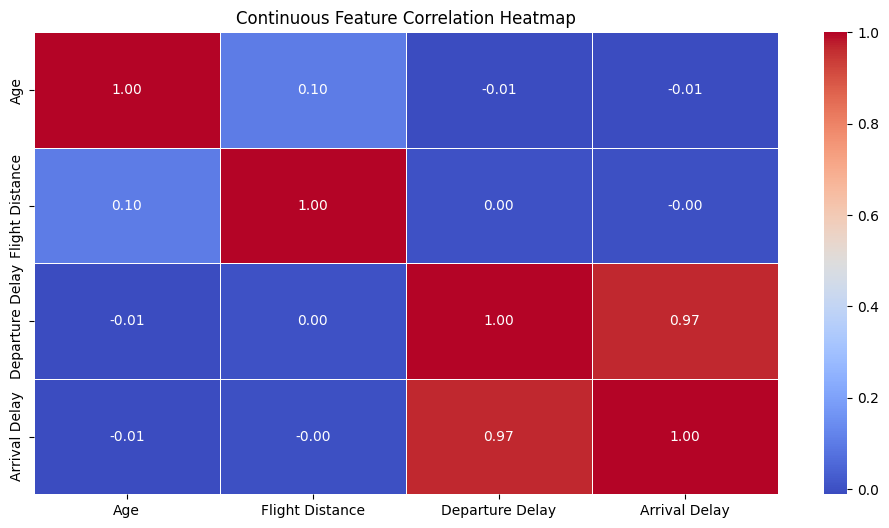

In [14]:
# Before the heatmap code:
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

# Then generate the heatmap with:
plt.figure(figsize=(12, 6))
sns.heatmap(df_original[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Continuous Feature Correlation Heatmap")
plt.show()

## Cleaning the Data

In [15]:
df_clean = df_original.copy()
df_clean.drop(columns=["ID"], inplace=True)

In [16]:
# Replace missing Arrival Delay with Departure Delay values
df_clean["Arrival Delay"].fillna(df_clean["Departure Delay"], inplace=True)
df_clean["Arrival Delay"] = df_clean["Arrival Delay"].round().astype(int)

# Verify that there are no more missing values
print("Remaining missing Arrival Delay values:", df_clean["Arrival Delay"].isnull().sum())
print("Data type of Arrival Delay:", df_clean["Arrival Delay"].dtype)

Remaining missing Arrival Delay values: 0
Data type of Arrival Delay: int64


####Scaling

In [17]:
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Display the scaled numerical columns
print(df_clean[numerical_cols].head())


        Age  Flight Distance  Departure Delay  Arrival Delay
0  0.566960        -0.370261        -0.333948      -0.263219
1 -0.292868        -0.370261         0.296454       0.617623
2  0.103976        -0.338179        -0.386481      -0.392754
3  0.699242         0.716512        -0.386481      -0.392754
4  0.633101         2.285515        -0.386481      -0.366847


#### **Categorical Variables: Binarisation (0/1) and One Hot Encoding**

Columns with categories were identified as pandas type 'Object'.

In order to make these categorical variables processable by the machine learning algorithms, they need to be converted to numbers. I will convert the categories of binary variables directly to 0 and 1, while for variables with more than one category I will use one-hot encoding.

One-hot encoding is a technique used in data preprocessing to convert categorical data (with more than 2 categories) into a numerical format.  

In [18]:
#df_original.columns

In [19]:
#categorical_columns = df_original.select_dtypes(include=['object']).columns.tolist()
#print(categorical_columns)
#df_original.info()

Step 1: extract binary categorical variables to convert them to 0 and 1

In [20]:
# Create a dictionary to store encoding mappings
encoding_mappings = []

# Select object type columns
object_cols = df_clean.select_dtypes(include=['object']).columns

# Filter for columns with 2 or fewer unique values
binary_categorical_cols = [col for col in object_cols
                           if df_clean[col].nunique() <= 2]

# Convert binary categorical columns to 0 and 1
for col in binary_categorical_cols:
    # Get unique values in the column
    unique_values = df_clean[col].unique()

    # Create a mapping dictionary for the column
    mapping = {unique_values[0]: 0, unique_values[1]: 1}

    # Apply the mapping to the column
    df_clean[col] = df_clean[col].map(mapping)

    # Store the mapping for the legend table
    encoding_mappings.extend([[col, val, encoded] for val, encoded in mapping.items()])

# Create the legend table
legend_table = pd.DataFrame(encoding_mappings, columns=["Column Name", "Original Value", "Encoded Value"])

# Display the legend table
print(legend_table)

      Column Name           Original Value  Encoded Value
0          Gender                     Male              0
1          Gender                   Female              1
2   Customer Type               First-time              0
3   Customer Type                Returning              1
4  Type of Travel                 Business              0
5  Type of Travel                 Personal              1
6    Satisfaction  Neutral or Dissatisfied              0
7    Satisfaction                Satisfied              1


In [21]:

for col in df_clean.columns:
  print(col)

Gender
Age
Customer Type
Type of Travel
Class
Flight Distance
Departure Delay
Arrival Delay
Departure and Arrival Time Convenience
Ease of Online Booking
Check-in Service
Online Boarding
Gate Location
On-board Service
Seat Comfort
Leg Room Service
Cleanliness
Food and Drink
In-flight Service
In-flight Wifi Service
In-flight Entertainment
Baggage Handling
Satisfaction


Step 2: extract categorical variables with more than two categories and One-hot Encode them

In [22]:
# prompt: select from df_clean all columns with more than 2 categories

# Identify columns with more than 2 categories
cols_to_Onehot_Encode = [col for col in df_clean.select_dtypes(include='object') if df_clean[col].nunique() > 2]

cols_to_Onehot_Encode.extend(['Departure and Arrival Time Convenience','Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'])
# Select those columns from the DataFrame
#df_selected = df_clean[cols_more_than_2_categories]

#print(df_selected.head())
cols_to_Onehot_Encode


['Class',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [23]:
encoder = OneHotEncoder(sparse_output=False)  # or sparse=False for older versions
#encoder
one_hot_encoded = encoder.fit_transform(df_clean[cols_to_Onehot_Encode])
#one_hot_encoded

# Get feature names for the encoded columns
encoded_column_names = encoder.get_feature_names_out(cols_to_Onehot_Encode)
#encoded_column_names
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoded_column_names)
#one_hot_df

In [24]:
# merge everything back together

# Concatenate the encoded DataFrame with the original DataFrame
df_clean = pd.concat([df_clean, one_hot_df], axis=1)

# Drop the original categorical columns
df_clean = df_clean.drop(columns=cols_to_Onehot_Encode)
df_clean.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Flight Distance',
       'Departure Delay', 'Arrival Delay', 'Satisfaction', 'Class_Business',
       'Class_Economy', 'Class_Economy Plus',
       'Departure and Arrival Time Convenience_0',
       'Departure and Arrival Time Convenience_1',
       'Departure and Arrival Time Convenience_2',
       'Departure and Arrival Time Convenience_3',
       'Departure and Arrival Time Convenience_4',
       'Departure and Arrival Time Convenience_5', 'Ease of Online Booking_0',
       'Ease of Online Booking_1', 'Ease of Online Booking_2',
       'Ease of Online Booking_3', 'Ease of Online Booking_4',
       'Ease of Online Booking_5', 'Check-in Service_0', 'Check-in Service_1',
       'Check-in Service_2', 'Check-in Service_3', 'Check-in Service_4',
       'Check-in Service_5', 'Online Boarding_0', 'Online Boarding_1',
       'Online Boarding_2', 'Online Boarding_3', 'Online Boarding_4',
       'Online Boarding_5', 'Gate Location_0',

In [25]:
# Create a list to store the changes
changes = []

# 1. Handle binary categorical columns
for col in binary_categorical_cols:
    original_values = df_original[col].unique()
    mapping = {original_values[0]: 0, original_values[1]: 1}
    for val, encoded in mapping.items():
        changes.append([col, val, col, f"{encoded} (originally '{val}')"])

# 2. Handle one-hot encoded columns (limited to specified columns)
specific_encoded_cols = ['Class_Business', 'Class_Economy', 'Class_Economy Plus']

# Directly iterate over the specific encoded columns
for encoded_col in specific_encoded_cols:
    original_col = 'Class'
    original_val = encoded_col.split('_', 1)[1]

    # Add the change record
    changes.append([original_col, original_val, encoded_col, "1 if the original value was '" + original_val + "' else 0"])

# Create the change table DataFrame
change_table = pd.DataFrame(changes, columns=["Original Column", "Original Value", "New Column", "New Value Representation"])
change_table



,Original Column,Original Value,New Column,New Value Representation
0,Gender,Male,Gender,0 (originally 'Male')
1,Gender,Female,Gender,1 (originally 'Female')
2,Customer Type,First-time,Customer Type,0 (originally 'First-time')
3,Customer Type,Returning,Customer Type,1 (originally 'Returning')
4,Type of Travel,Business,Type of Travel,0 (originally 'Business')
5,Type of Travel,Personal,Type of Travel,1 (originally 'Personal')
6,Satisfaction,Neutral or Dissatisfied,Satisfaction,0 (originally 'Neutral or Dissatisfied')
7,Satisfaction,Satisfied,Satisfaction,1 (originally 'Satisfied')
8,Class,Business,Class_Business,1 if the original value was 'Business' else 0
9,Class,Economy,Class_Economy,1 if the original value was 'Economy' else 0


## Feature Engineering

## Supervised Machine Learning

- Partition data into training and test set
- Use random forest as classifier X-predictors (all variables) Y-Satisfaction

x1 + x2 + x3 + x4 = Y (satisfied/not satisfied)
- Fit model on training set: X_training set (matrix) Y_training column

- Test the model: feed to the model the X_test set to predict the Y_test column
- Evaluate model (accuracy, precision, f1-score, confusion matrix, AUROC)

#### Random Forest

In [26]:
# 1️⃣ Split the data into predictors (X) and outcome (y)
X = df_clean.drop('Satisfaction', axis=1)
y = df_clean['Satisfaction']

# 2️⃣ Split into training & test sets (as you already did)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Set up GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 4️⃣ Initialize GridSearchCV (Random Forest Classifier)
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid={'n_estimators': [100, 150], 'max_depth': [None, 10]},
                           cv=3, scoring='accuracy', n_jobs=-1)

# 5️⃣ Fit GridSearchCV **ONLY ON TRAINING DATA**
grid_search.fit(X_train, y_train)

# Display best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# 5️⃣ Predict with best estimator found by GridSearchCV
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 6️⃣ Evaluate on test set (to check real-world performance)
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'n_estimators': 150}
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14723
           1       0.97      0.94      0.95     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



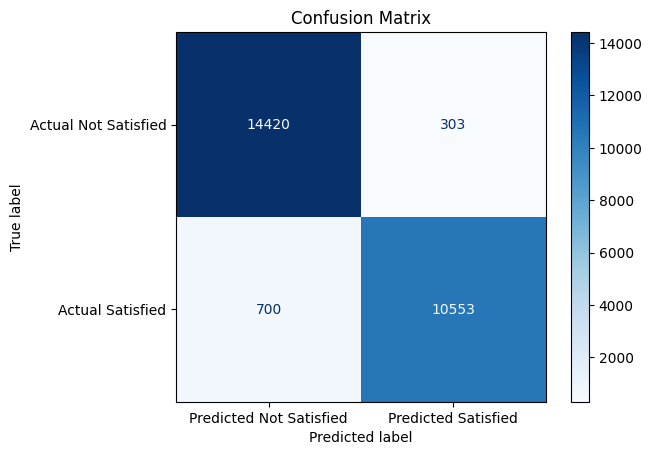

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_estimator(
    best_rf,
    X_test,
    y_test,
    cmap='Blues',
    display_labels=['Not Satisfied', 'Satisfied']  # Add display labels for the legend
)
display.ax_.set_title("Confusion Matrix") # Set the title of the confusion matrix
display.ax_.grid(False)
display.ax_.xaxis.set_ticklabels(['Predicted Not Satisfied', 'Predicted Satisfied']) # Set the x-axis tick labels
display.ax_.yaxis.set_ticklabels(['Actual Not Satisfied', 'Actual Satisfied']) # Set the y-axis tick labels

plt.show()

In [28]:
# Import the necessary function
from sklearn.metrics import roc_auc_score

# Predict probabilities using the best estimator from GridSearchCV
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9938232897529332


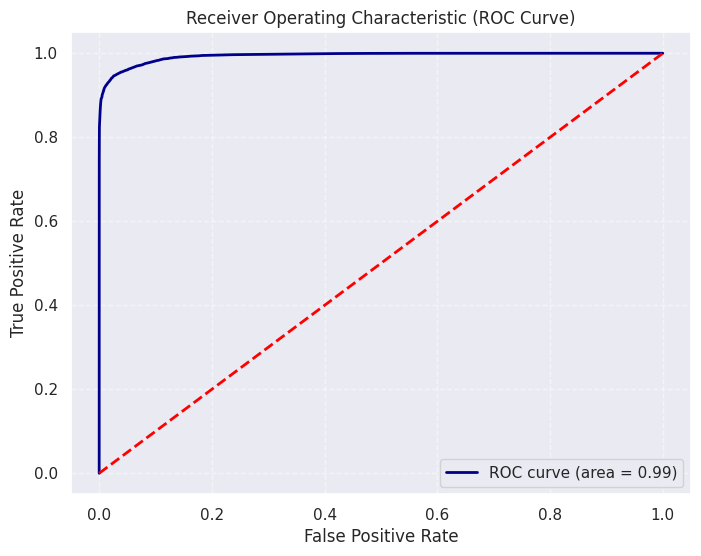

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', linewidth=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

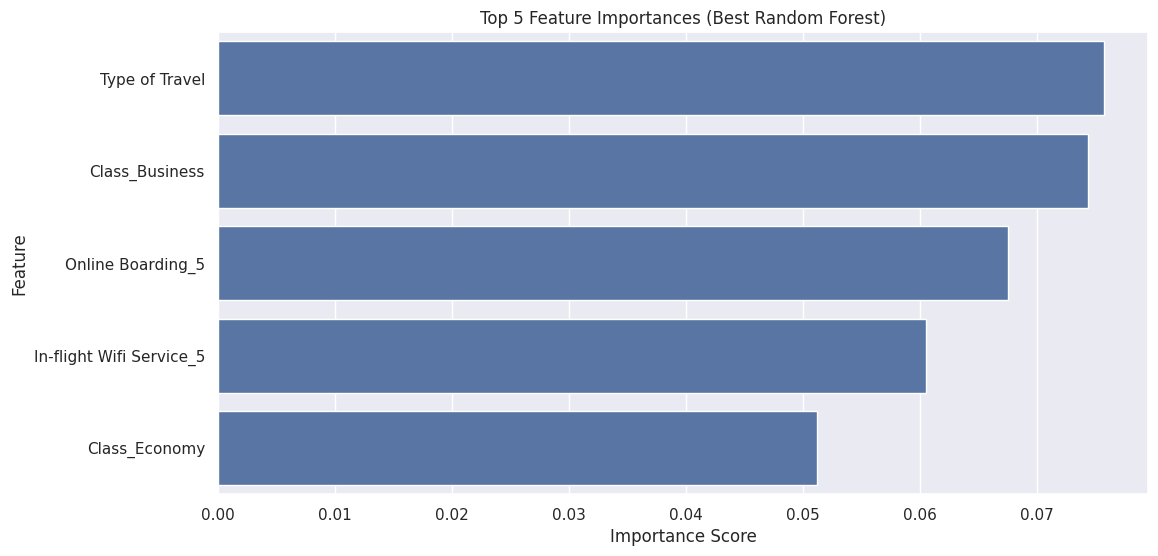

In [30]:
# Ensure you're using the best estimator from GridSearchCV
best_rf = grid_search.best_estimator_

# Calculate feature importance from the best estimator
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by='Importance', ascending=False)

# Plot top 5 features clearly
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5))
plt.title('Top 5 Feature Importances (Best Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#### Extreme Gradient Boosting

Accuracy: 0.9645826917154297
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



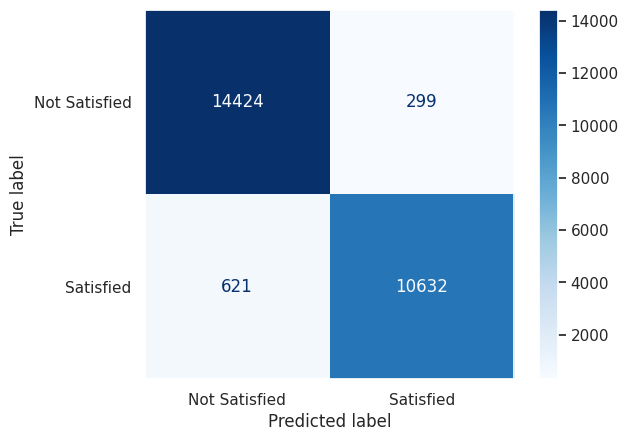

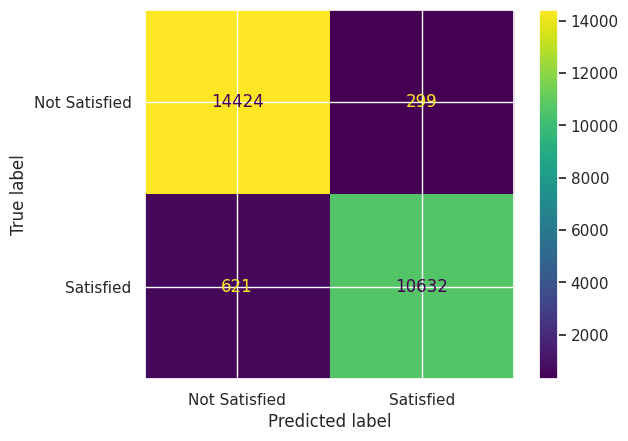

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create an XGBoost classifier instance
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1)


# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator found by GridSearchCV
best_xgb_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred, target_names=['0', '1']))

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Display confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(
    best_xgb_classifier,
    X_test,
    y_test,
    cmap='Blues',
    ax=ax,
    display_labels=['Not Satisfied', 'Satisfied'] # This line adds the legend
)

cm_display.plot()  # Add this line to ensure the legend is displayed

ax.grid(False)
plt.show()

In [32]:
y_pred_proba = best_xgb_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9951290491522892


(0.0, 1.05)

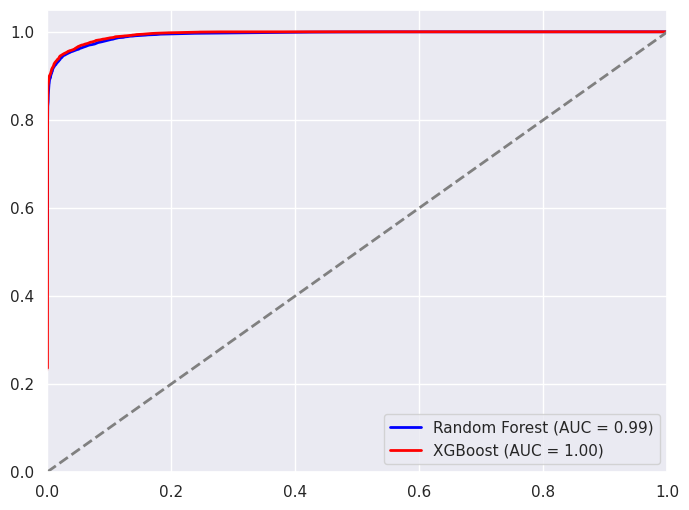

In [33]:
# Get predicted probabilities for both models
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = best_xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_rf, y=tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
sns.lineplot(x=fpr_xgb, y=tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

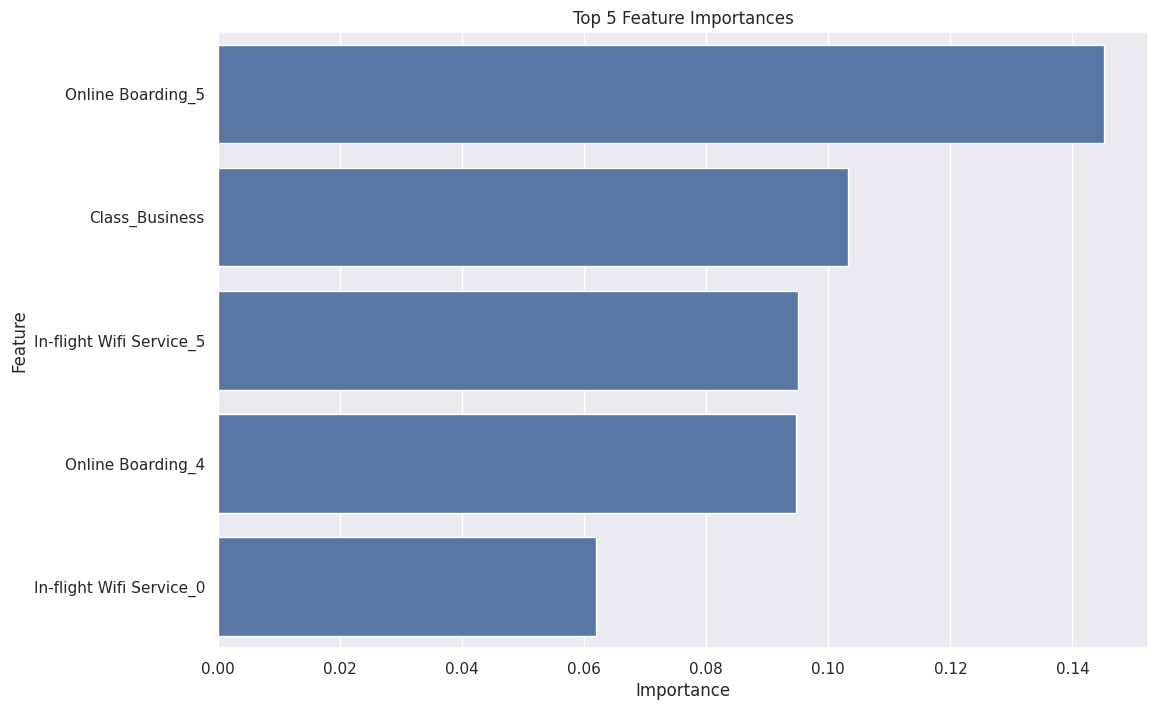

In [34]:
# Calculate feature importance
importances = best_xgb_classifier.feature_importances_ # Use the fitted model from GridSearchCV
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5))  # Show top 5 features
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker  # Import for formatting

def plot_satisfaction_by_category(df, categorical_column):
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    ax = sns.countplot(y=categorical_column, hue='Satisfaction',  # Changed x to y for horizontal bars
                      palette={'Satisfied': 'b', 'Neutral or Dissatisfied': 'navy'},
                      data=df)

    # Get the patches (bars) for the 'Neutral or Dissatisfied' category
    neutral_or_dissatisfied_patches = [p for p in ax.patches
                                       if p.get_facecolor() == sns.color_palette("tab10")[0]]

    # Set the alpha (transparency) for those patches to 0.5 (50%)
    for patch in neutral_or_dissatisfied_patches:
        patch.set_alpha(0.5)

    # Get actual counts for each category and set y-tick labels
    counts = df[categorical_column].value_counts().to_dict()
    plt.gca().set_yticklabels([label.get_text() for label in plt.gca().get_yticklabels()])

    # Format x-axis (count) to display in 'xK' format
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x/1000)))

    plt.title(f'Satisfaction by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel(categorical_column)
    ax.tick_params(left=False)
    ax.tick_params(bottom=False)
    plt.legend(title='Satisfaction')
    plt.show()

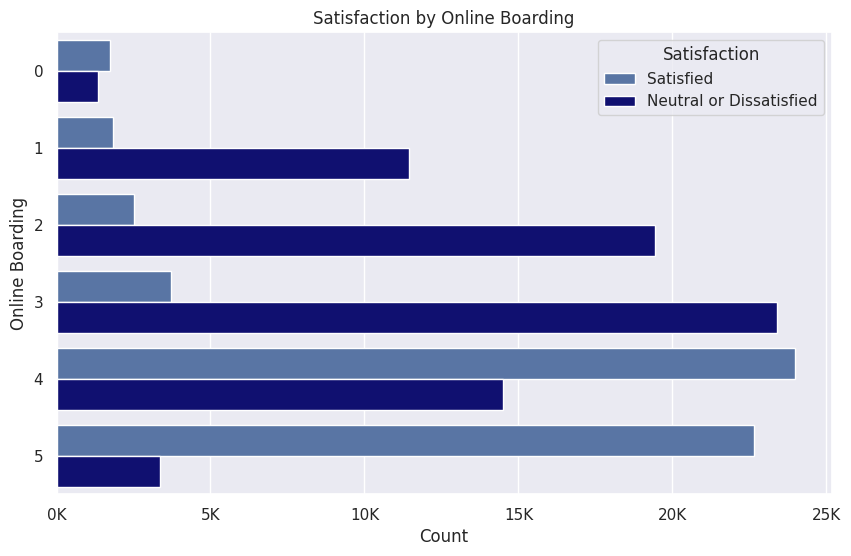

In [36]:
plot_satisfaction_by_category(df_original, 'Online Boarding')

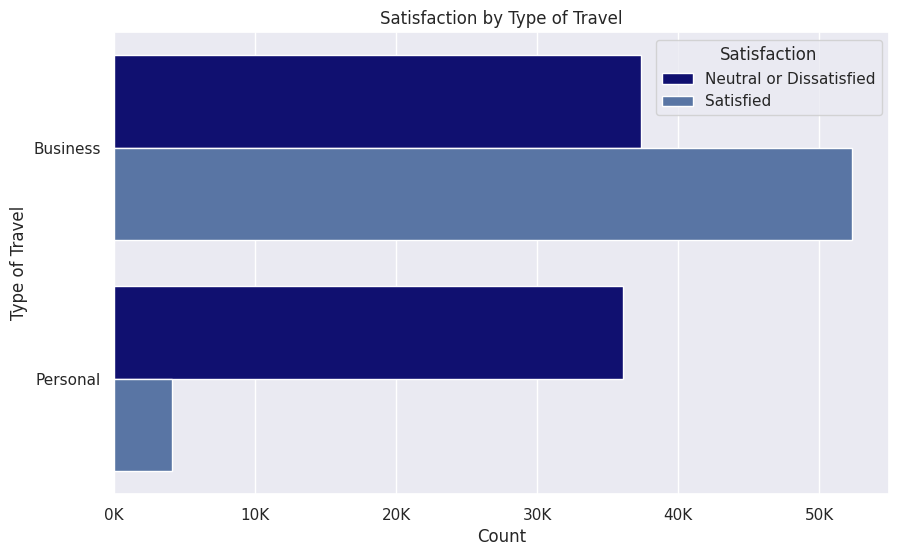

In [37]:
plot_satisfaction_by_category(df_original, 'Type of Travel')

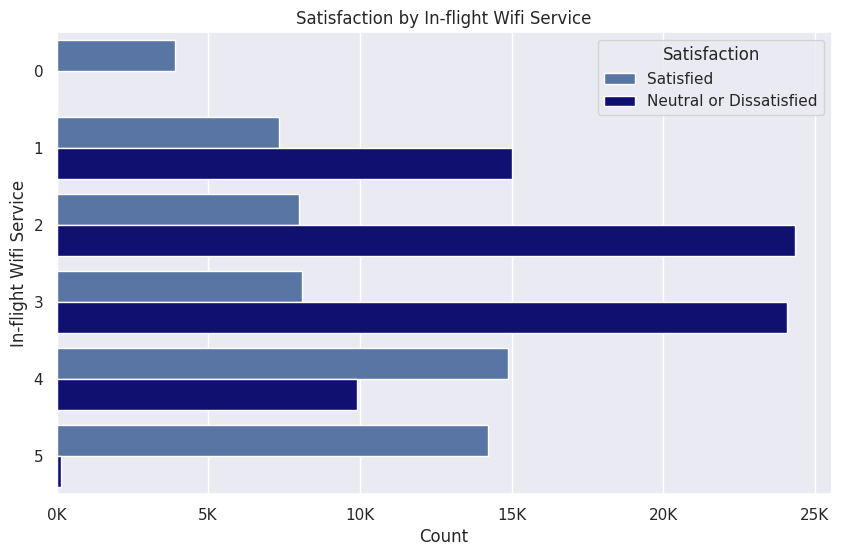

In [38]:
plot_satisfaction_by_category(df_original, 'In-flight Wifi Service')

### Unsupervised Learning

Identify customer segments based on customer demographics and the top 5 predictors of XGBoost model.

Scaling is required for Unsupervised Learning as values in different scales would would affect the results. In this dataset, the scales are,for example:

	•	Age (0–100 years)
	•	Flight Distance (0–10,000 miles)
	•	Satisfaction Ratings (1–5 points)

Without scaling, the flight distance would have a distorted level of importance in the cluster, skewing the results and potentially making them misleading.

In [39]:
df_clean.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Satisfaction,Class_Business,Class_Economy,...,In-flight Entertainment_1,In-flight Entertainment_2,In-flight Entertainment_3,In-flight Entertainment_4,In-flight Entertainment_5,Baggage Handling_1,Baggage Handling_2,Baggage Handling_3,Baggage Handling_4,Baggage Handling_5
0,0,0.566960,0,0,-0.370261,-0.333948,-0.263219,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,-0.292868,1,0,-0.370261,0.296454,0.617623,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0.103976,1,0,-0.338179,-0.386481,-0.392754,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.699242,1,0,0.716512,-0.386481,-0.392754,1,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0.633101,1,0,2.285515,-0.386481,-0.366847,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
# Select features based on domain expertise and feature importance
clustering_features = ['Gender', 'Age', 'Type of Travel',
                       'Online Boarding_5', 'In-flight Wifi Service_5', 'Satisfaction']

# Create a new DataFrame with selected features
X_cluster = df_clean[clustering_features]

In [41]:
# Calculate silhouette score using a sample of data points
sample_size = 1000  # Adjust sample size as needed
sample_indices = np.random.choice(X_cluster.shape[0], size=sample_size, replace=False)

In [42]:
# Range of cluster values to test
k_values = range(2, 11)  # Test k from 2 to 10
silhouette_scores = []

for k in k_values:
    # Create a KMeans instance with current k
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the data
    cluster_labels = kmeans.fit_predict(X_cluster)

    # Calculate silhouette score
    score = silhouette_score(X_cluster.iloc[sample_indices], cluster_labels[sample_indices])
    silhouette_scores.append(score)

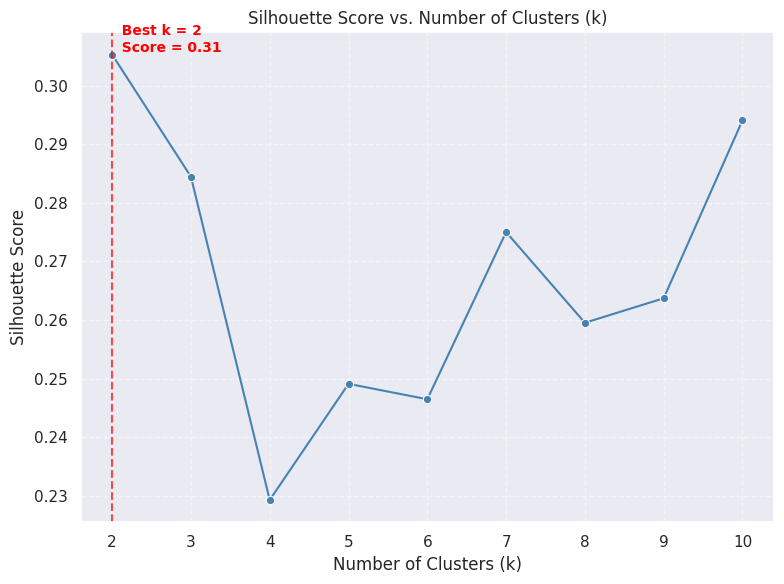

In [43]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=silhouette_scores, marker='o', color='steelblue')

# Highlight the highest silhouette score
max_score_idx = silhouette_scores.index(max(silhouette_scores))
best_k = k_values[max_score_idx]
best_score = silhouette_scores[max_score_idx]

# Annotate the optimal k clearly on the plot
plt.axvline(x=best_k, linestyle='--', color='red', alpha=0.7)
plt.text(best_k, best_score, f'  Best k = {best_k}\n  Score = {best_score:.2f}',
         verticalalignment='bottom', color='red', fontsize=10, fontweight='bold')

# Add clear plot labels and title
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

As the dataset is quite large, a sample of the dataset will be used to generate the images of the silhouette diagrams for 2 to 7 clusters to show how the clusters would be grouped.

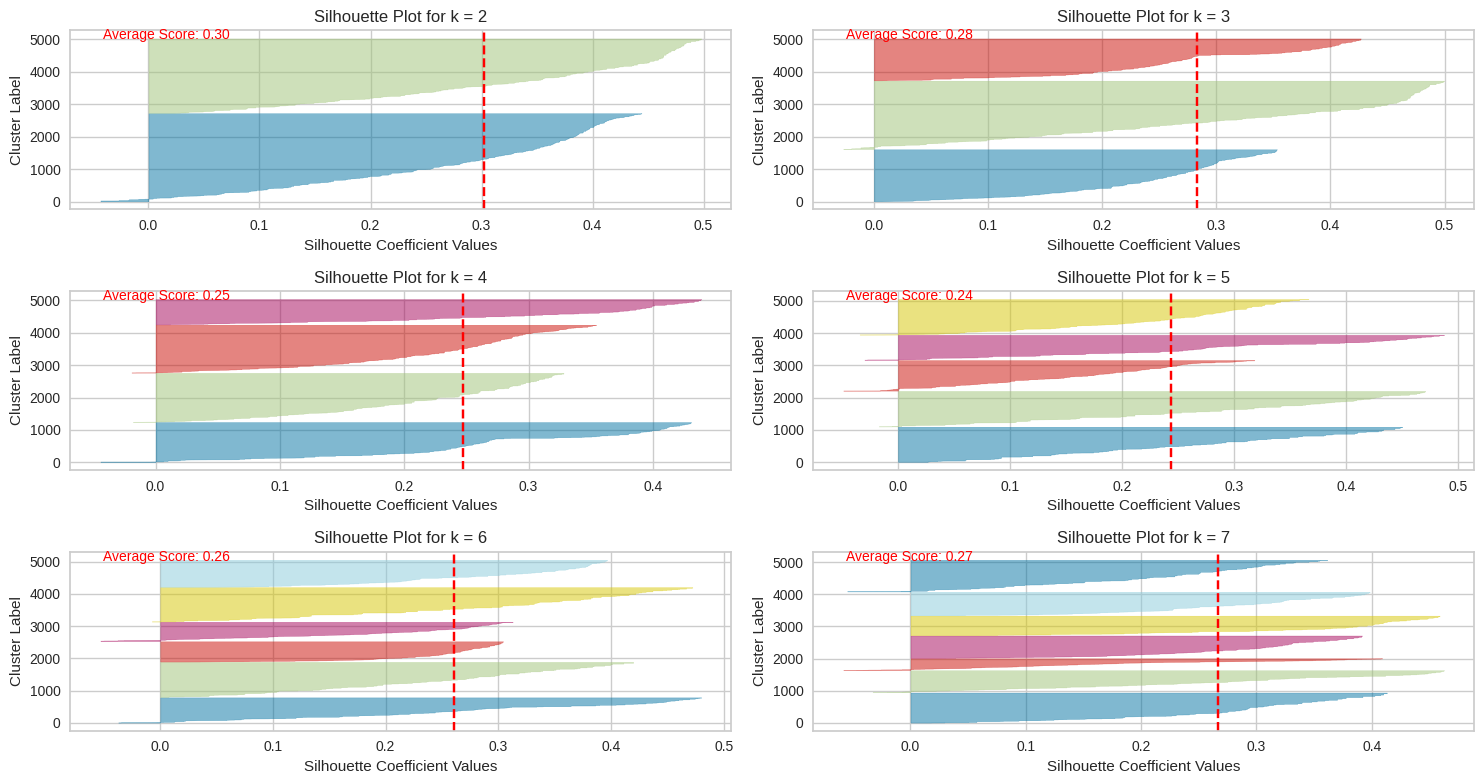

In [44]:
# Take a random sample of your data (e.g., 5000 rows)
X_sample = X_cluster.sample(n=5000, random_state=42)

fig, ax = plt.subplots(3, 2, figsize=(15, 8))

for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer using your X_cluster data
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q - 1][mod])
    visualizer.fit(X_sample)  # Using the sample here

    # Add title to each subplot
    visualizer.ax.set_title(f"Silhouette Plot for k = {i}")

    # Add axis labels
    visualizer.ax.set_xlabel("Silhouette Coefficient Values")
    visualizer.ax.set_ylabel("Cluster Label")

    # Annotate the red line (average silhouette score)
    avg_score = visualizer.silhouette_score_
    visualizer.ax.text(0.05, 0.95, f"Average Score: {avg_score:.2f}",
                       transform=visualizer.ax.transAxes, color="red", fontsize=10)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

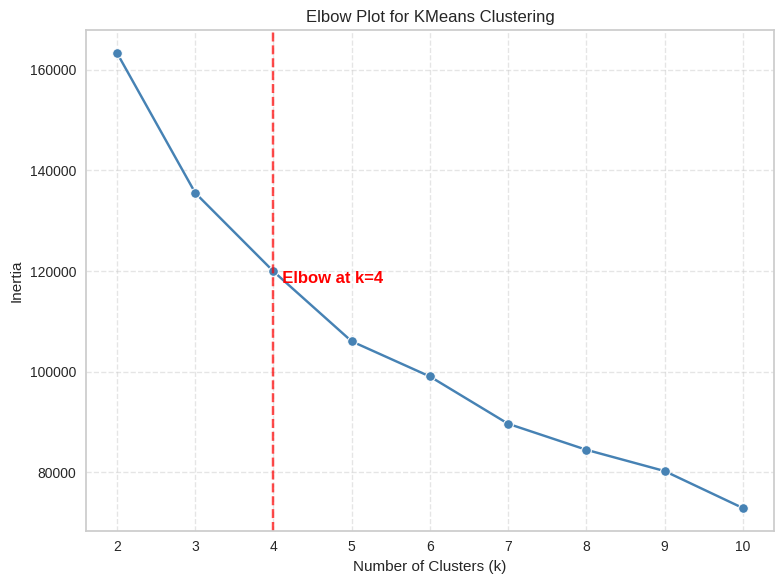

In [45]:
# First, run your original inertia calculation:
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=inertia_values, marker='o', color='steelblue')

# Identify the elbow point (visually, or by your decision)
# Example: assuming k=4 is the elbow point based on visual judgment
elbow_k = 4
elbow_inertia = inertia_values[k_values.index(elbow_k)]

# Annotate clearly
plt.axvline(x=elbow_k, linestyle='--', color='red', alpha=0.7)
plt.text(elbow_k, elbow_inertia, f'  Elbow at k={elbow_k}',
         verticalalignment='top', color='red', fontsize=12, fontweight='bold')

# Finalize plot details
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

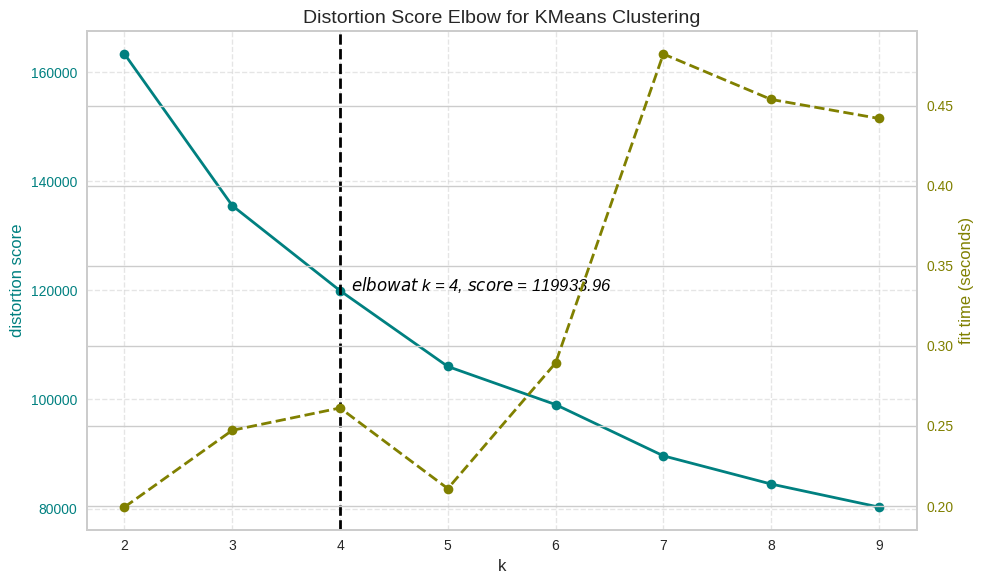

In [46]:
k_values = range(2, 10)
distortion_scores = []
fit_times = []

# Calculate inertia and fitting time for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    start_time = time.time()
    kmeans.fit(X_cluster)
    end_time = time.time()

    distortion_scores.append(kmeans.inertia_)
    fit_times.append(end_time - start_time)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot distortion scores (left axis)
ax1.plot(k_values, distortion_scores, marker='o', color='teal', linewidth=2)
ax1.set_xlabel('k', fontsize=12)
ax1.set_ylabel('distortion score', color='teal', fontsize=12)
ax1.tick_params(axis='y', labelcolor='teal')

# Plot fit time (right axis)
ax2 = ax1.twinx()
ax2.plot(k_values, fit_times, marker='o', color='olive', linestyle='--', linewidth=2)
ax2.set_ylabel('fit time (seconds)', color='olive', fontsize=12)
ax2.tick_params(axis='y', labelcolor='olive')

# Add vertical dashed line clearly at k=4 (elbow)
elbow_k = 4  # Adjust this as per your data
ax1.axvline(x=elbow_k, linestyle='--', color='black', linewidth=2)
ax1.text(elbow_k + 0.1, distortion_scores[elbow_k - k_values[0]],
         f'$elbow at$ k = {elbow_k}, $score$ = {distortion_scores[elbow_k - k_values[0]]:.2f}',
         fontsize=12, fontstyle='italic', color='black')

# Title and grid styling
plt.title('Distortion Score Elbow for KMeans Clustering', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [47]:
# Create a KMeans instance with k=3 and a random state for reproducibility
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to your data
kmeans.fit(X_cluster)

KMeans(n_clusters=2, random_state=42)

In [48]:
# Get the cluster labels for each data point
cluster_labels = kmeans.labels_
# Add the cluster labels to your original DataFrame (optional)
X_cluster['Cluster'] = cluster_labels

In [49]:
df_clean['Cluster'] = cluster_labels

In [50]:
def plot_cluster_by_category(df, categorical_column):
    plt.figure(figsize=(10, 6))

    # Retrieve actual category labels from data (assuming exactly 2 categories)
    unique_categories = sorted(df_clean[categorical_column].unique())
    palette = ['blue', 'navy']

    # Create countplot clearly using custom palette
    ax = sns.countplot(
        y='Cluster',
        hue=categorical_column,
        palette=palette,
        data=df_clean
    )

    # Set transparency: Only blue bars (first category) to 50%, navy bars opaque
    num_categories = len(unique_categories)
    num_clusters = df_clean['Cluster'].nunique()

    # Adjust transparency carefully
    patches = ax.patches
    for i, patch in enumerate(patches):
        # Bars are ordered sequentially by hue/category, adjust transparency accordingly
        hue_category_index = i // num_clusters
        if hue_category_index == 0:  # First category ("blue")
            patch.set_alpha(0.5)
        else:                        # Second category ("navy")
            patch.set_alpha(1.0)

    # Set custom legend with actual category names
    handles, labels = ax.get_legend_handles_labels()
    labels = [str(cat) for cat in unique_categories]  # Actual category names
    ax.legend(handles, labels, title=categorical_column, loc='best')

    # Format x-axis as 'K' for thousands
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    plt.title(f'Cluster by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel('Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

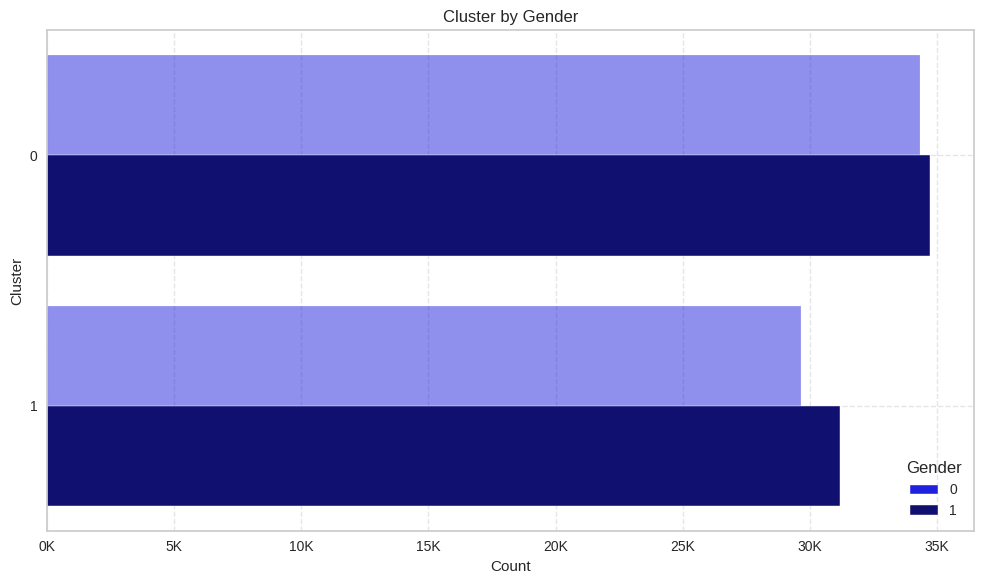

In [51]:
plot_cluster_by_category(df_clean, 'Gender')

In [52]:
def plot_cluster_by_category(df, categorical_column, legend_table):
    plt.figure(figsize=(10, 6))

    # Extract mapping directly from legend_table for the chosen categorical_column
    mapping_df = legend_table[legend_table["Column Name"] == categorical_column]
    value_mapping = dict(zip(mapping_df["Encoded Value"], mapping_df["Original Value"]))

    # Map the encoded values directly in your data
    df_temp = df.copy()
    df_temp[categorical_column] = df_temp[categorical_column].map(value_mapping)

    # Extract actual category names after mapping
    unique_categories = list(df_temp[categorical_column].unique())
    palette = ['blue', 'navy'] if len(unique_categories) == 2 else sns.color_palette('husl', len(unique_categories))

    # Plot the countplot clearly using the mapped labels
    ax = sns.countplot(
        y='Cluster',
        hue=categorical_column,
        palette=palette,
        data=df_temp
    )

    # Adjust transparency carefully: first category to 50%, others opaque
    num_clusters = df_temp['Cluster'].nunique()
    for i, patch in enumerate(ax.patches):
        hue_category_index = i // num_clusters
        patch.set_alpha(0.5 if hue_category_index == 0 else 1.0)

    # Set legend using mapped labels
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, unique_categories, title=categorical_column, loc='best')

    # Format x-axis clearly as 'K' (e.g., "5K", "10K")
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    plt.title(f'Cluster by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel('Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

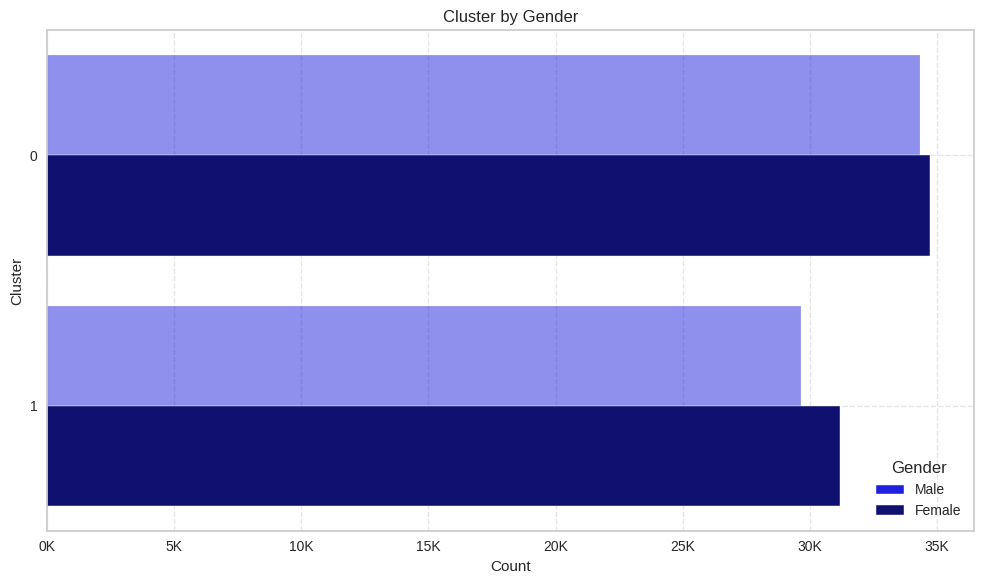

In [53]:
plot_cluster_by_category(df_clean, 'Gender', legend_table) # Assuming legend_table exists

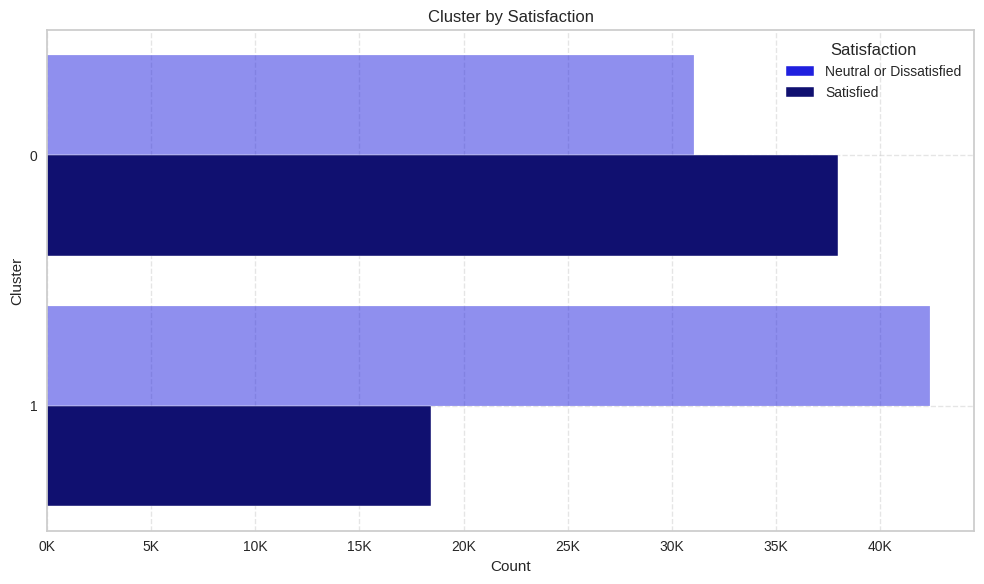

In [54]:
plot_cluster_by_category(df_clean, 'Satisfaction', legend_table)

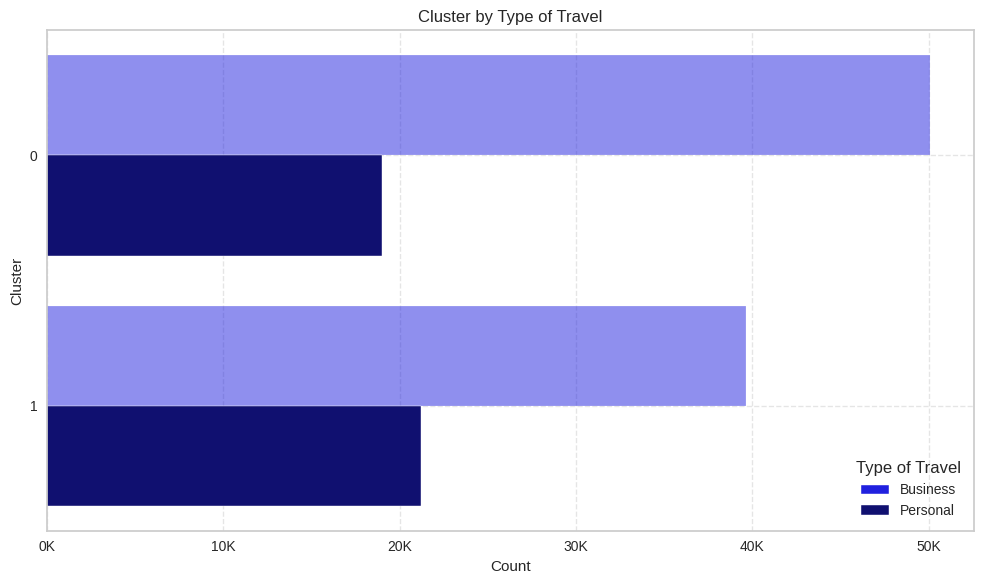

In [55]:
plot_cluster_by_category(df_clean, 'Type of Travel', legend_table)

In [64]:
def plot_cluster_by_category(df, categorical_column):
    plt.figure(figsize=(10, 6))

    # Get unique categories directly from df_clean
    unique_categories = sorted(df[categorical_column].unique())

    # Use a blue color palette based on the number of categories
    palette = sns.color_palette("Blues_d", n_colors=len(unique_categories))

    # Plot the countplot using original categories
    ax = sns.countplot(
        y='Cluster',
        hue=categorical_column,
        palette=palette,
        data=df
    )

    # Adjust transparency: first category to 50%, others opaque
    num_clusters = df['Cluster'].nunique()
    for i, patch in enumerate(ax.patches):
        hue_category_index = i // num_clusters
        patch.set_alpha(0.5 if hue_category_index == 0 else 1.0)

    # Set custom legend with original category names
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, unique_categories, title=categorical_column, loc='best')

    # Format x-axis as 'K' for thousands
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    plt.title(f'Cluster by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel('Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

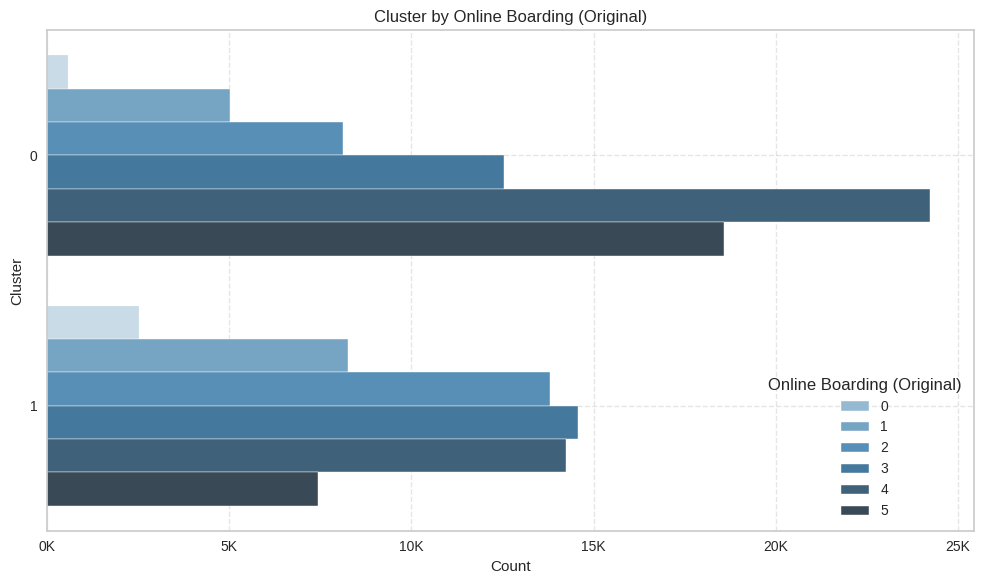

In [65]:
# Create a copy of df_clean to avoid modifying the original
df_cluster_analysis = df_clean.copy()

# Revert one-hot encoding for 'Online Boarding' in the new DataFrame
online_boarding_cols = [col for col in df_cluster_analysis.columns if col.startswith('Online Boarding_')]
df_cluster_analysis['Online Boarding (Original)'] = df_cluster_analysis[online_boarding_cols].idxmax(axis=1).str.split('_').str[-1].astype(int)

# Now you can use df_cluster_analysis for plotting
plot_cluster_by_category(df_cluster_analysis, 'Online Boarding (Original)')

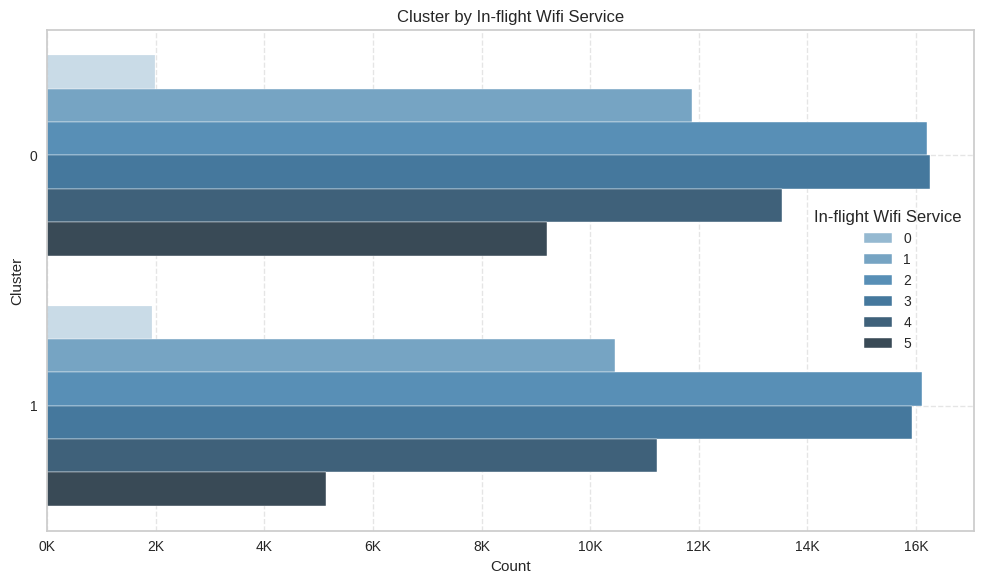

In [91]:
def plot_cluster_by_category(df, categorical_column):
    # Check if categorical_column is in original form and use it
    original_col_name = categorical_column + ' (Original)'
    plotting_column = original_col_name if original_col_name in df.columns else categorical_column

    # Check if plotting_column exists before getting unique values
    if plotting_column in df.columns:
        unique_categories = sorted(df[plotting_column].unique())
    else:
        print(
            f"Warning: Column '{categorical_column}' and its encoded versions not found in DataFrame. Skipping plot.")
        return  # Exit the function to avoid further errors

    # Use a blue color palette
    palette = sns.color_palette("Blues_d", n_colors=len(unique_categories))

    # Plot the countplot
    plt.figure(figsize=(10, 6))  # Create figure inside the function
    ax = sns.countplot(
        y='Cluster',
        hue=plotting_column,  # Use plotting_column here
        palette=palette,
        data=df
    )

    # Adjust transparency
    num_clusters = df['Cluster'].nunique()
    for i, patch in enumerate(ax.patches):
        hue_category_index = i // num_clusters
        patch.set_alpha(0.5 if hue_category_index == 0 else 1.0)

    # Set legend
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, unique_categories,
              title=categorical_column, loc='best')

    # Format x-axis
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    plt.title(f'Cluster by {categorical_column}')
    plt.xlabel('Count')
    plt.ylabel('Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


def revert_one_hot_encoding(df):
    # Revert one-hot encoding for relevant columns
    relevant_cols = ['Online Boarding', 'Type of Travel',
                    'In-flight Wifi Service', 'In-flight Service']  # Add 'In-flight Service'
    for col in relevant_cols:
        encoded_cols = [c for c in df.columns if c.startswith(
            col + '_')]
        if encoded_cols:  # Only proceed if encoded columns exist
            # Create the '(Original)' column if it doesn't exist
            original_col_name = col + ' (Original)'
            if original_col_name not in df.columns:
                # Get the original values from the encoded columns
                df[original_col_name] = pd.Series(
                    dtype='object')  # Initialize as object type

                # Iterate through encoded columns to extract original values
                for encoded_col in encoded_cols:
                    original_value = encoded_col.split('_')[
                        1]  # Extract original value from encoded column name

                    try:
                        original_value = int(
                            original_value)  # Convert to integer if possible
                    except ValueError:
                        pass  # If not an integer, keep as string

                    # Add original values to the new column
                    condition = df[encoded_col] == 1  # Find rows with 1 in this encoded column
                    df.loc[condition,
                           original_col_name] = original_value

                # Ensure the data type is integer for 'In-flight Service'
                if col == 'In-flight Service':
                    df[original_col_name] = pd.to_numeric(
                        df[original_col_name], errors='coerce').astype(pd.Int64Dtype())
    return df


# Ensure df_cluster_analysis is updated before plotting:
df_cluster_analysis = revert_one_hot_encoding(df_cluster_analysis)
plot_cluster_by_category(
    df_cluster_analysis, 'In-flight Wifi Service')

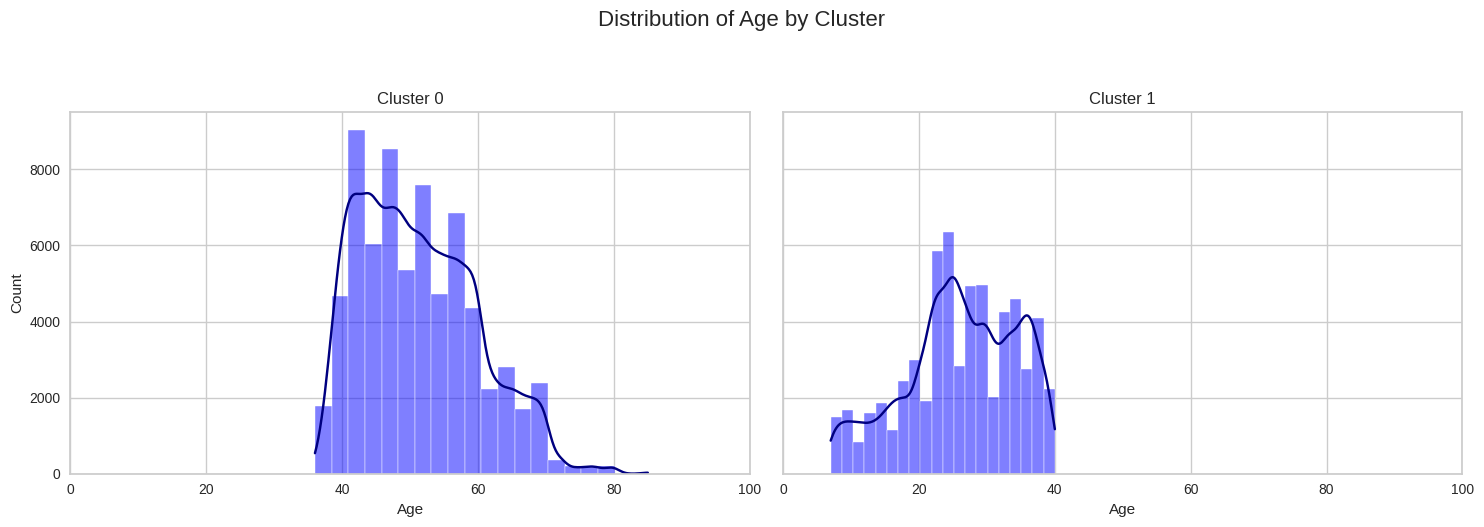

In [100]:
# Assuming you have your scaler object saved as `scaler`
# ... (code to get your original scaler object) ...

# Get original age values (replace numerical_cols if necessary)
original_age_values = scaler.inverse_transform(df_cluster_analysis[numerical_cols])[:, numerical_cols.index('Age')]

# Add the original age values to df_cluster_analysis
df_cluster_analysis['Age (Original)'] = original_age_values

# Create figure and axes objects
fig, axes = plt.subplots(1, df_cluster_analysis['Cluster'].nunique(), figsize=(15, 5), sharey=True)

# Flatten axes for easier iteration if necessary
axes = axes.flatten() if df_cluster_analysis['Cluster'].nunique() > 1 else [axes]

# Iterate through clusters and plot on respective axes
for i, cluster in enumerate(df_cluster_analysis['Cluster'].unique()):
    cluster_data = df_cluster_analysis[df_cluster_analysis['Cluster'] == cluster]
    sns.histplot(cluster_data['Age (Original)'], bins=20, kde=True, color='blue', alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Cluster {cluster}")
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Count" if i == 0 else "")  # Only label y-axis for the first subplot
    axes[i].set_xlim(0, 100)
    axes[i].lines[0].set_color('navy')

# Centralize the main title above all subplots
fig.suptitle('Distribution of Age by Cluster', fontsize=16, y=1.05, ha='center')

plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
# Test to see if keep

df_encoded["Long Delay"] = (df_encoded["Arrival Delay"] > 30).astype(int)
df_encoded.head()

In [ ]:
# Test to see if keep

df_encoded["Loyal Business Traveler"] = ((df_encoded["Customer Type"] == 0) & (df_encoded["Type of Travel"] == 0)).astype(int)
df_encoded.head()

#### Feature Stability

#### Linear Regression

In [ ]:
# Test to see if keep

# Count zeros in each rating feature
features = ['Age', 'Flight Distance', 'In-flight Wifi Service',
            'Departure and Arrival Time Convenience', 'Ease of Online Booking',
            'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
            'In-flight Entertainment', 'On-board Service', 'Leg Room Service',
            'Baggage Handling', 'Check-in Service', 'In-flight Service',
            'Cleanliness', 'Departure Delay', 'Arrival Delay',
            ]
zero_counts = (df_original[features] == 0).sum().sort_values(ascending=False)

# Display counts
print("Number of zeros per feature:")
print(zero_counts)

# Visualize the counts clearly
plt.figure(figsize=(10, 5))
sns.barplot(x=zero_counts.values, y=zero_counts.index, palette="magma")
plt.title("Count of Zero ('Not Applicable') Values per Feature")
plt.xlabel("Number of Zeros")
plt.ylabel("Feature")
plt.show()